# Greetings traveller! 
Welcome to Week 1 of the AIAP coursework. In the next 6 weeks, you will be *travelling* through the machine learning *space*, where we will be looking at various different machine learning problems and how to solve them. We will be taking a quick sweep through the many areas of analytics and machine learning, including learning about learning from data itself.

## Course Objectives

This course is designed to be different from the courses you have done previously. We acknowledge that there are lots of great free resources online, and are not trying to create yet another tutorial. Rather, we attempt to provide something that complements them, mirroring real-life problem solving. In general, we have the following goals out of the programme:
- __Finger-dipping exposure into ML__: we concede that six weeks are insufficient to fully understand ML, and we do not aim to do that. Rather, we would like to provide sufficient breadth in terms of practical, useful knowledge in the area.
- __Confidence to go further yourself__: the ML space is vast and expanding every day, no practitioner is ever sufficently trained to tackle any problem. Rather, good data scientists hone a sharp ability to learn new techniques to solve novel problems. We wish to build your confidence to go into the unknown, so that you can rely on yourself for learning beyond textbook knowledge.
- __Programming competency__: while we are not training software engineers, writing good, clean code is crucial to the success of any project that requires programming. We will provide guidance on how to write reproducible, human-centric code for data science that will pay dividends for a project in the long term.
- __Employability__: ultimately, we aim to help you get hired in the data science space, and we have crafted our notebooks to act like mock technical assessments in a safe space. The six week programme will equip you with critical soft skills for data science as well.

## Prerequisite Knowledge

This is certainly not a course for beginners. Considering that this will be a full-time, six-week programme, we have designed the course to be challenging in every aspect. Realistically, we would not expect anyone to be comfortable handling the course. Although the programme will be challenging, we wish to cultivate a forgiving, learning-based culture where necessary failure is celebrate encouraged and celebrated. Nevertheless, the following prerequisites will help you do well in this course:
- __Python, or general programming skills__: an ability to execute basic tasks beyond hello world in Python, or simply being comfortable with computer languages in general
- __Numerical programming__: an ability to execute mathematical scripts through a programming language like Python (it will be relatively easy to transition from Matlab, R, SAS or Julia)
- __Statistical fundamentals__: you should know how basic tools like linear and logistic regression work, and have a mathematical appreciation for it
- __Linear algebra and calculus__: basic mathematical knowledge will help you appreciate the algorithms and learn to use them better
- __A positive learning attitude__ most importantly, because realistically, no one will have all of the above, so we will all need to adapt and learn.

## Learning Resources 

At one or more points in time while attempting this notebook, you may find the following resources to be useful:
- Intro to Python Programming: [Python at PluralSight](https://app.pluralsight.com/paths/skills/python)*
- Numerical computing in Python: [Python for Data Science, 2nd Ed. by Wes McKinney](http://wesmckinney.com/pages/book.html)
- Random Forests in depth and from scratch: [fast.ai Machine Learning Course](https://course.fast.ai/ml)
- Organising your notebook: [initial steps toward reproducible research by Karl Broman](https://kbroman.org/steps2rr/)
- Finding specific methods in Pandas: [Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/)
- All the answer keys you'll ever need: [Kaggle's Titanic Kernel](https://www.kaggle.com/c/titanic/kernels)

*You'll get free access to Pluralsight's Python track through your DataCamp subscription!

These are just recommended resources - do tap on anything you find useful, or approach us for alternative recommendations.

## Collaboration Policy

Collaboration is the best way to learn. In short, we should optimise learning - the general rule is to try everything yourself first, then discuss your method with your teammates. Do not directly copy their code, unless you are trying to learn a programming technique. Be smart and flexible - do your own thinking and write your own code.

If you believe referring to someone's answer is the best way to learn, we recommend looking at the code, then walking away for a few minutes, and come back to write your own version of the code. There will be minimum policing, but we expect no plagurism or direct copying of code to occur.

Please list your collaborators:

## Time Management

In this notebook, there will two main areas of focus: modelling, and model implementation (numerical programming). Different people will have different strengths, and our advice is to play to your strengths, and collaborate to learn from people who can teach you something, but offer something in return. Unless you are really good with everything the notebook needs you to do, __you are not likely to finish the notebook by doing it alone__.

For those who are very new to programming, it's okay to realise that you might not finish the notebook this week. If you are feel that you might not be ready to mix different technical fields together, considering spending more time building up your fundamentals instead - take your time if you need to. If you need more assistance, don't hesitate to speak to us!

Now, let's get into week one of the course! __Good luck, have fun.__

# 1. Initial Modelling 

Our problem this week is the el classico: the Titanic dataset, a dataset probably done to death by fellow travellers of the machine learning space. There is a reason why this dataset is so popular - it demands for all the fundamentals required of statistical modelling, while staying light in terms of technical demands. With just 891 rows of data, the problem can be solved on any laptop. While your laptop would not face much stress this week, we would recommend you to consider your technical set-up, so that as heavier datasets come about (in the size of GBs), you will not be limited by them.

First, go grab the data. The data is available at https://www.kaggle.com/c/titanic/data, you will need to register an account to retrieve it.

Since we are talking about downloading data, we should take this time to set up your folder. One such way (our recommended way) to do it as to create a project folder, then leave your notebooks in the root of that folder. Your code base, which we will be starting to build over time, should be in a `src` subfolder, while your data should be in a `data` folder, with a tree structure as shown:

```
aiap
 |- src
 |- data
 |   |- titanic.csv
 |   |- titanic_test.csv
 |- week1.ipynb
```

This is an opinionated format - we suggest this only for simplicity reasons.

Now, we are ready to do some coding work. First, import the necessary libraries you need.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, f1_score
from pdpbox import pdp, get_dataset, info_plots
import numpy as np

C:\Users\Raymond\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Import your data.

In [2]:
titanic_raw = pd.read_csv('data/titanic.csv')

## Initial Model 

Train a stock random forest model (with no custom parameters and report the accuracy score). Do the __minimal__ cleaning required to let your model fit into the model. Using the `train_test_split` method, reserve some validation data for evaluation use.

You may see an accuracy of approximately 75% - this does not mean anything substantially, but it lets us know that a no-value-add approach to modelling will already generate this accuracy for us. Hence, our goal is to improve upon this current score, and reach as high as possible. For now, 75% is good enough for us to proceed.

In [3]:
print(titanic_raw.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
titanic_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Check if there are any missing data

In [6]:
titanic_raw.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Dropping columns with difficult to handle strings first.

In [7]:
X_train = titanic_raw.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
Y_train = titanic_raw["Survived"]

Replace missing age with the mean age and missing embarkment with the most common classifier.

In [8]:
freq_port = X_train.Embarked.dropna().mode()[0]
freq_port

'S'

In [9]:
avg_age = round(X_train.Age.mean())
avg_age

30

In [10]:
X_train['Embarked'] = X_train['Embarked'].fillna(freq_port)
X_train['Age'] = X_train['Age'].fillna(avg_age)

In [11]:
X_train['Embarked'] = X_train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
X_train['Sex'] = X_train['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [12]:
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,0
1,2,1,0,38.0,1,0,71.2833,1
2,3,3,0,26.0,0,0,7.9250,0
3,4,1,0,35.0,1,0,53.1000,0
4,5,3,1,35.0,0,0,8.0500,0


In [13]:
X_train_main, X_train_cv, y_train_main, y_train_cv = train_test_split(X_train, 
                                                    Y_train,
                                                    train_size=0.7, 
                                                    test_size=0.3, 
                                                    random_state=0)

In [14]:
rf = RandomForestClassifier()
rf.fit(X_train_main, y_train_main)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [15]:
rf.score(X_train_cv, y_train_cv)

0.7947761194029851

# 2. Exploring the data 

## Overall Dataset 

Conduct some initial exploration of this data. This could be through dataset level plots, correlation charts and table describes, as well as by understanding what kind of information is available, or not available (i.e. missing). Write a paragraph on what you observe in the data. There is no correct answer, but do present useful and insightful information as much as possible.

This part of the notebook should be helpful to someone who is trying to come into your project, but has no knowledge of the data. In complex, real-world problems, there may be multiple data sources, each with different structures of data. Making sense of data at this macro level may happen over several months in an iterative manner.

In [16]:
titanic = pd.read_csv('data/titanic.csv')
titanic_test = pd.read_csv('data/titanic_test.csv')

In [17]:
print(titanic.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [18]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
# Generates descriptive statistics for column with objects
titanic.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Paulner, Mr. Uscher",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


1) The Age, Cabin and Embarked features contains missing data that requires to be handled.

2) From the competition description, it is stated that 1502 out of 2224 had perished in the sinking of Titanic. That means a survival rate of about 32%. In this sample of 891 record, 38% survived which is quite representative of the actual rate. 

3) More than 75% of the passengers did not travel with their parent or children.

4) More than 50% of the passengers travelled alone (no parent, child, spouse, sibling).

5) More than 50% of the passengers did not travel with their spouse or siblings. 

6) More than 75% of the passengers are below the age of 38. Meaning the passengers are generally quite young.

7) Fare have a very high standard deviation, meaning it is quite varied. The average is $32 but more than 75% of the passengers pay less than the average fare.

8) Name is unique for all the records. This is to be expected for name.

9) 65% of the passengers are male.

10) There seem to be duplicates among the records for cabin. This probably means that some of the passengers share cabins.

11) 72% of the passengers embarked from port 'S'.

12) The ticket feature shows a 23% of duplicates across the records. Which is interesting, since it is expected for ticket numbers to be unique. This might suggest that the tickets are purchased together. Hence passengers with the same ticket number might be related to each other but might have no blood relation (for example friends).

## Individual Variables 

We now go deeper into individual variables. For each variable, provide plots, tables or descriptions that best capture the nuance of that column. There is no correct answer, but there is a gold standard.

Samples of this can be found in Kaggle's kernels page. While we value pretty charts, we value insights much more. Where insightful information is found, please indicate them in your notebook for your reader.

You may wish to strategically go deeper into variables you find more interesting. There is no need to scrutinize every variable.

Ref: https://stats.idre.ucla.edu/other/mult-pkg/whatstat/what-is-the-difference-between-categorical-ordinal-and-interval-variables/

### PassengerId

PassengerId is an arbitrary number assigned to each record as an unique key and should be dropped when doing training and prediction.

### Survived

38% of the sample survived. This is a target value for each of the record. It would be used as a point of reference for each of the other variables.

### Pclass

In [22]:
titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


This is a ordinal feature. With 1 being the highest class and 3 being the lowest class for the tickets. 

There seem to be a correlation of class with survival rate. With 1st class having the highest survival rate of 63% and 3rd class having the lowest survival rate of 24%.

This feature will be included in our model.

### Name

Name is a very unique string that identifies each individual. It will not be included in the model initially. But it contains title of the individual which could be useful. It will be considered for feature engineering.

### Sex

In [23]:
titanic[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


This is a categorical feature. Females have a very high survival rate of 74%. This feature appears to be highly determining factor for survival.

This feature will be included in our model.

### Age

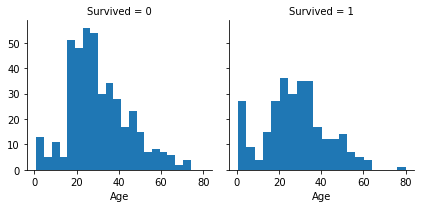

In [24]:
g1 = sns.FacetGrid(titanic, col='Survived')
g1.map(plt.hist, 'Age', bins=20)

Age is a continuous numerical feature. Infants appears to have a high survival rate. Those between age of 10+ to 40 appears to have a low survival rate. In addition the oldest passenger have survived.

This feature will be included in our model.

### SibSp

In [25]:
titanic[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


This is a numerical feature with a discrete value. Those travelling with a lower number of siblings and spouse seem to have a higher survival rate.

This feature will be included in our model.

### Parch

In [26]:
titanic[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


This is a numerical feature with a discrete value. Similarly those travelling with a lower number of parents and children seem to have a higher survival rate.

This feature will be included in our model.

### Ticket

Duplicate value in ticket likely means they are purchased together, hence those passengers should know each other. But this feature would likely to be dependent on SibSp and Parch feature. If this feature is to be used for our model, some feature engineering would be required.

### Fare

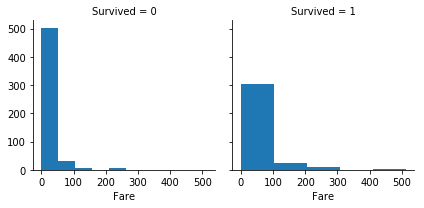

In [27]:
g1 = sns.FacetGrid(titanic, col='Survived')
g1.map(plt.hist, 'Fare', bins=5)

Fare is a continous numerical feature. It appears that when the fare is high, the probability of survival increases.

This feature will be included in our model.

### Cabin

77% of the records have missing value for cabin. It is hard to find meaningful replacement value for each of the missing record. Hence this feature will be dropped.

### Embarked

In [28]:
titanic[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


This is a categorical feature. Passengers who embarked from C appears to have a higher survival rate.

This feature will be included in our model.

## Overall Summary 

From your own exploration of the data, provide a few paragraphs in summary of the dataset. At this point, it may be helpful to provide a narrative which can reconstruct the situation aboard the titanic as it was sinking. This is also an opportunity to direct your attention towards areas where you feel information is raw and can be improved in your next section, through feature engineering.

Overall, it appears that some variables are more significant than others, but we would imagine that females and children, especially those who embarked at 'C' and are affluent, hence being able to pay for expensive tickets, will survive, while young men whom travelled alone with no kids or parents are most likely to have perished. 

# 3. Model Interpretation and Feature Engineering

In this section, we will begin by learning to appreciate the model interpretation methods related to decision trees and random forests. Please do some of your own research about these approaches. Then, we will move on to do some feature engineering - hopefully this will give us some information gain with respect to the dataset.

## Model Interpretation

### Feature importance
Plot a graph/table of feature importance of variables. Is there anything to be expected out of the data? Is there anything unexpected? Compare these findings with your teammate - are there any major differences in these plots?

In [29]:
freq_port = titanic.Embarked.dropna().mode()[0]
freq_port

'S'

In [30]:
avg_age = round(titanic.Age.mean())
avg_age

30

In [31]:
titanic['Embarked'] = titanic['Embarked'].fillna(freq_port)
titanic['Age'] = titanic['Age'].fillna(avg_age)

titanic_test['Embarked'] = titanic_test['Embarked'].fillna(freq_port)
titanic_test['Age'] = titanic_test['Age'].fillna(avg_age)

titanic['Embarked'] = titanic['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
titanic['Sex'] = titanic['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

titanic_test['Embarked'] = titanic_test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
titanic_test['Sex'] = titanic_test['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [32]:
X_titanic = titanic.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
Y_titanic = titanic["Survived"]

titanic_test = titanic_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [33]:
X_titanic_train, X_titanic_cv, Y_titanic_train, Y_titanic_cv = train_test_split(X_titanic, 
                                                    Y_titanic,
                                                    train_size=0.7, 
                                                    test_size=0.3, 
                                                    random_state=0)

In [34]:
rf = RandomForestClassifier()
rf.fit(X_titanic_train, Y_titanic_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [35]:
rf.score(X_titanic_cv, Y_titanic_cv)

0.8134328358208955

In [36]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_titanic_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [37]:
print(feature_importances)

          importance
Sex         0.272305
Fare        0.263592
Age         0.261908
Pclass      0.068224
SibSp       0.060310
Parch       0.038072
Embarked    0.035589


### Partial Dependence 

Another useful interpretation plot is partial dependence. `sklearn` might not have a workable library out of the box, so one option would be to try `pdpbox`.

In [38]:
titanic_for_plot = titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [39]:
titanic_features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

In [40]:
pdp_pclass = pdp.pdp_isolate(
    model=rf, dataset=X_titanic_train, model_features=titanic_features, feature='Pclass'
)

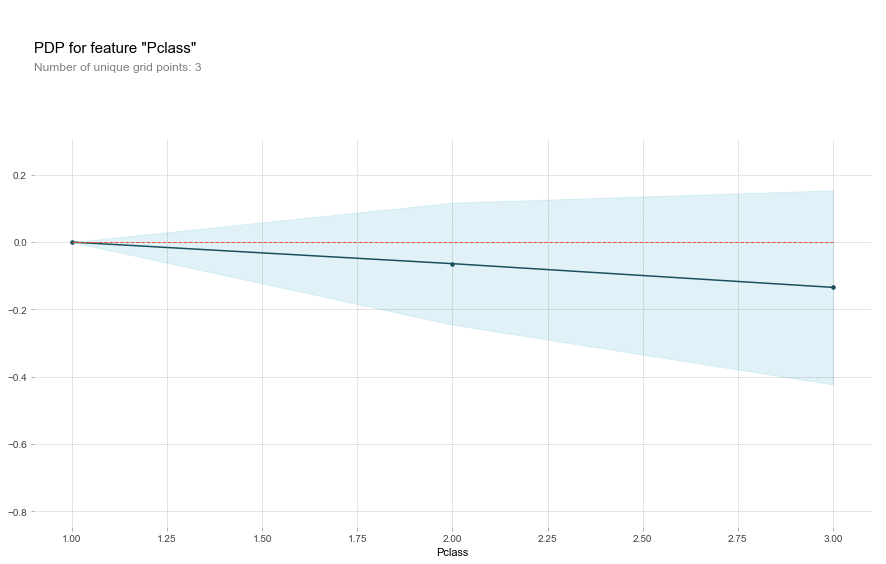

In [41]:
fig, axes = pdp.pdp_plot(pdp_pclass, 'Pclass')
_ = axes['pdp_ax']

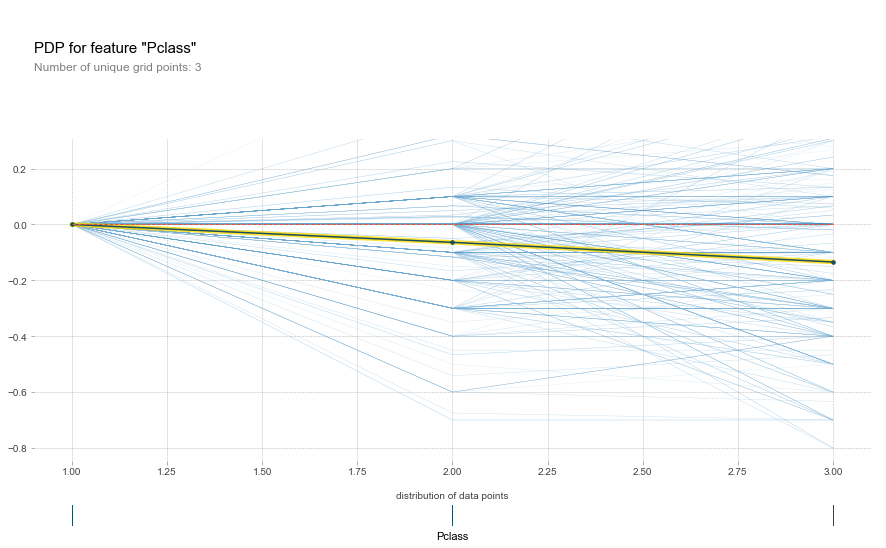

In [42]:
fig, axes = pdp.pdp_plot(pdp_pclass, 'Pclass', plot_lines=True, frac_to_plot=0.5, plot_pts_dist=True)

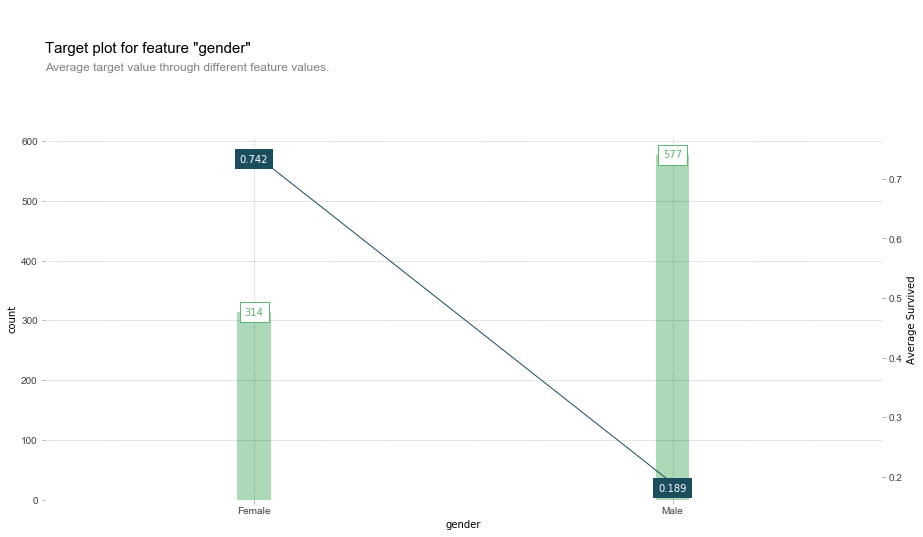

In [43]:
fig, axes, summary_df = info_plots.target_plot(
    df=titanic_for_plot, feature='Sex', feature_name='gender', target='Survived'
)
_ = axes['bar_ax'].set_xticklabels(['Female', 'Male'])

In [44]:
pdp_sex = pdp.pdp_isolate(
    model=rf, dataset=X_titanic_train, model_features=titanic_features, feature='Sex'
)

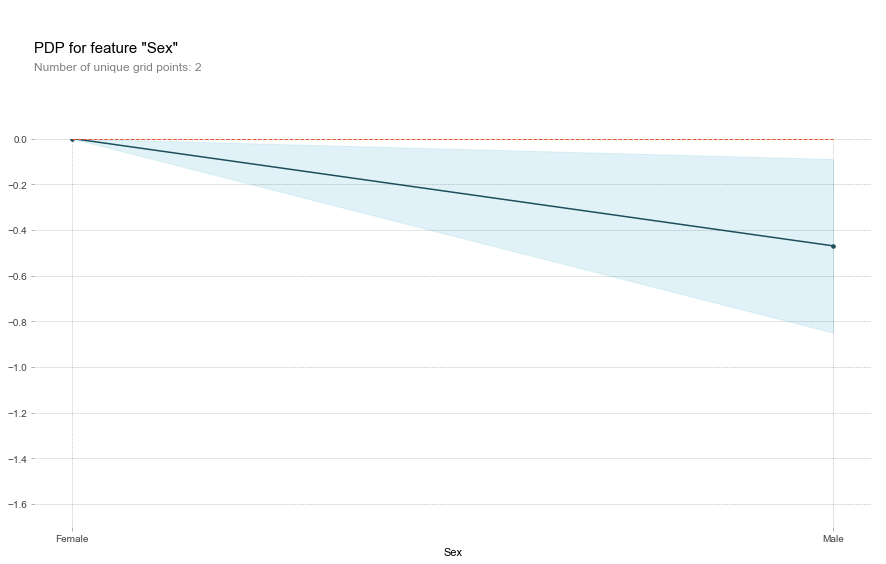

In [45]:
fig, axes = pdp.pdp_plot(pdp_sex, 'Sex')
_ = axes['pdp_ax'].set_xticklabels(['Female', 'Male'])

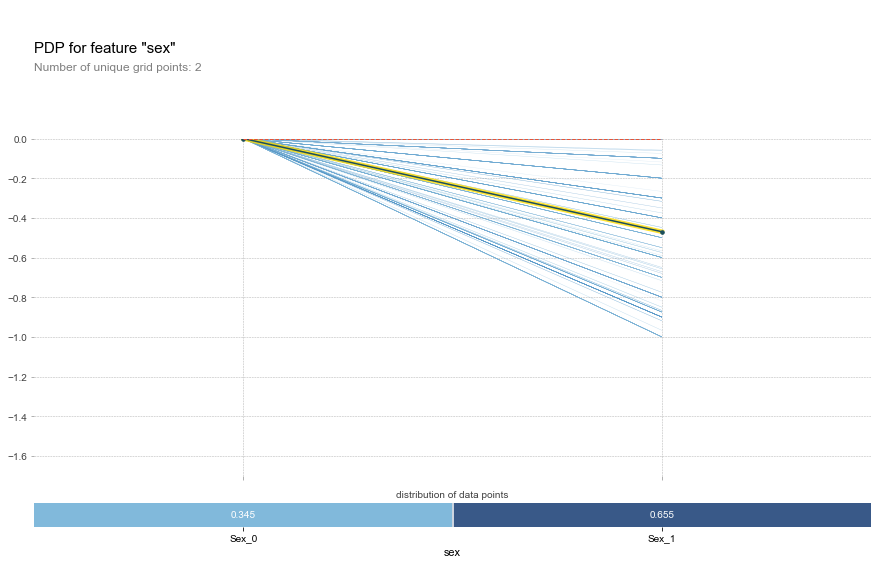

In [46]:
fig, axes = pdp.pdp_plot(pdp_sex, 'sex', plot_lines=True, frac_to_plot=0.5, plot_pts_dist=True)

In [47]:
pdp_age = pdp.pdp_isolate(
    model=rf, dataset=X_titanic_train, model_features=titanic_features, feature='Age'
)

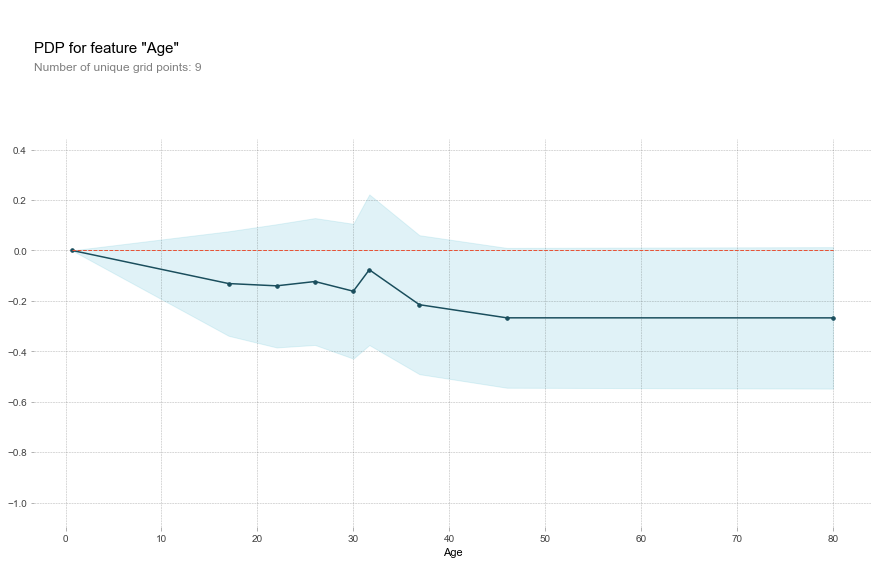

In [48]:
fig, axes = pdp.pdp_plot(pdp_age, 'Age')
_ = axes['pdp_ax']

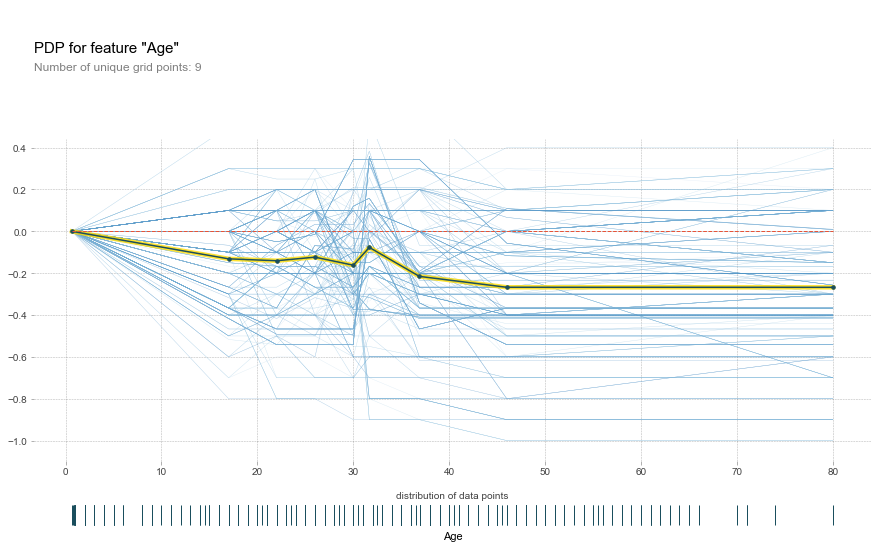

In [49]:
fig, axes = pdp.pdp_plot(pdp_age, 'Age', plot_lines=True, frac_to_plot=0.5, plot_pts_dist=True)

In [50]:
pdp_sibsp = pdp.pdp_isolate(
    model=rf, dataset=X_titanic_train, model_features=titanic_features, feature='SibSp'
)

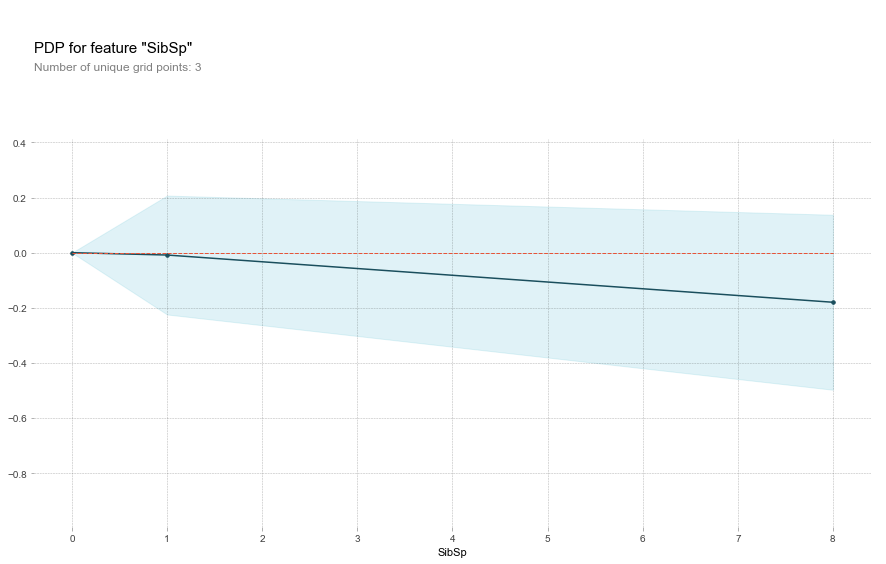

In [51]:
fig, axes = pdp.pdp_plot(pdp_sibsp, 'SibSp')
_ = axes['pdp_ax']

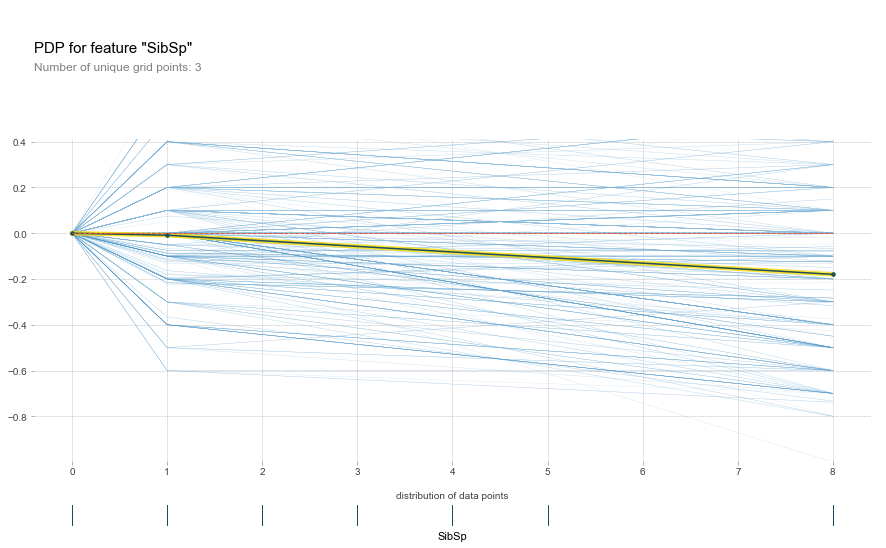

In [52]:
fig, axes = pdp.pdp_plot(pdp_sibsp, 'SibSp', plot_lines=True, frac_to_plot=0.5, plot_pts_dist=True)

In [53]:
pdp_parch = pdp.pdp_isolate(
    model=rf, dataset=X_titanic_train, model_features=titanic_features, feature='Parch'
)

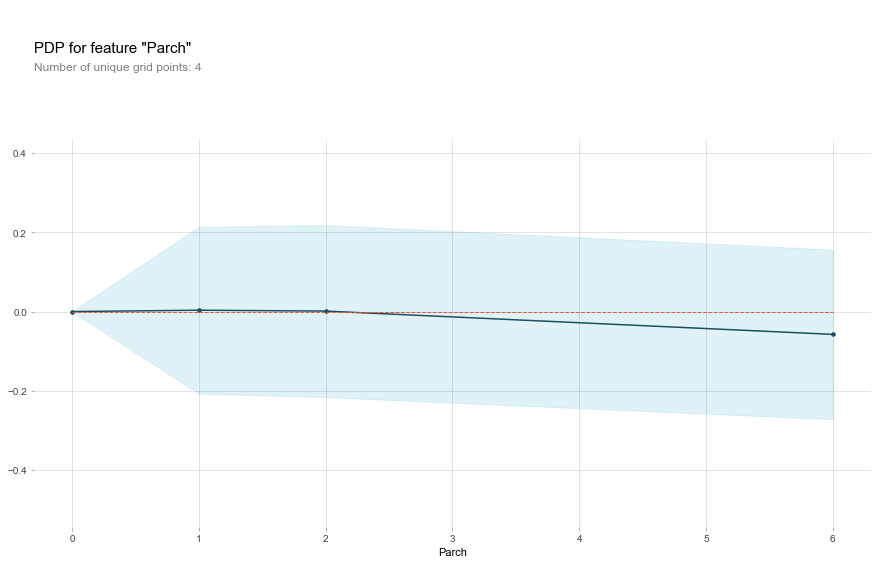

In [54]:
fig, axes = pdp.pdp_plot(pdp_parch, 'Parch')
_ = axes['pdp_ax']

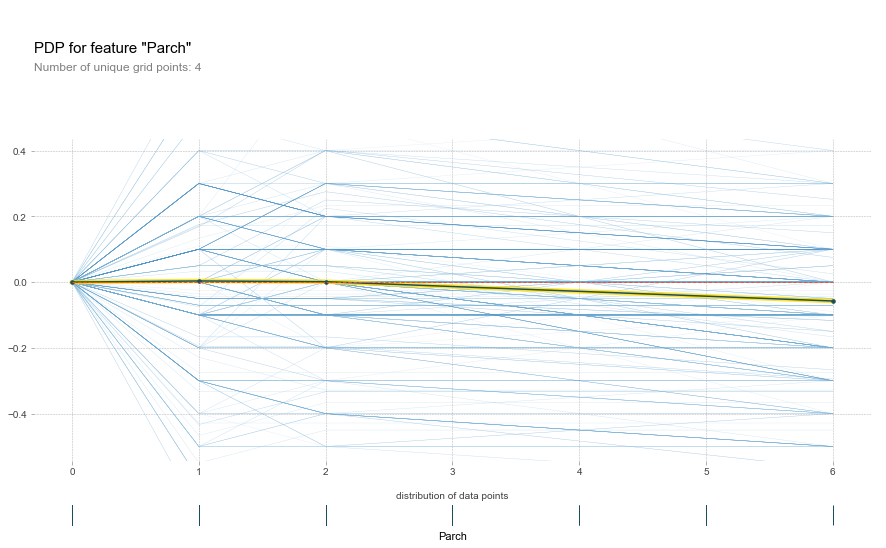

In [55]:
fig, axes = pdp.pdp_plot(pdp_parch, 'Parch', plot_lines=True, frac_to_plot=0.5, plot_pts_dist=True)

In [56]:
pdp_fare = pdp.pdp_isolate(
    model=rf, dataset=X_titanic_train, model_features=titanic_features, feature='Fare'
)

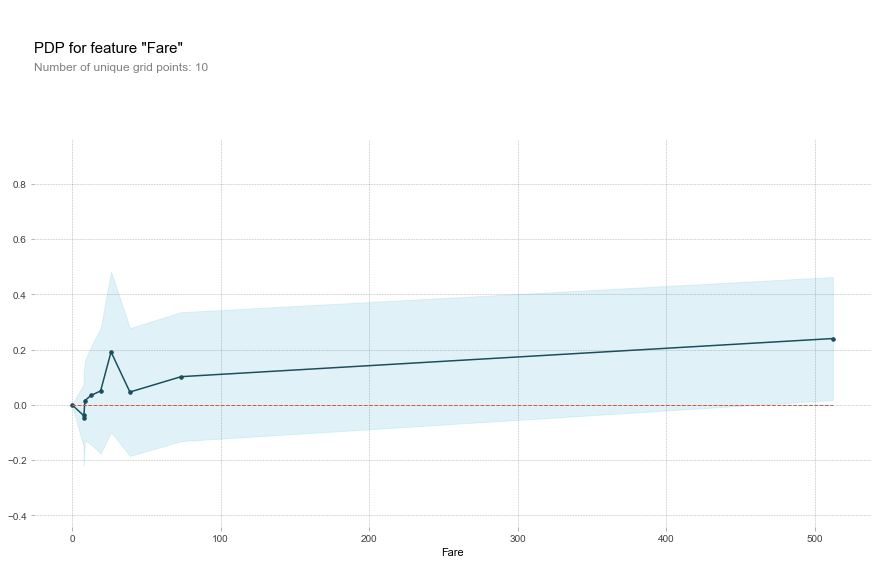

In [57]:
fig, axes = pdp.pdp_plot(pdp_fare, 'Fare')
_ = axes['pdp_ax']

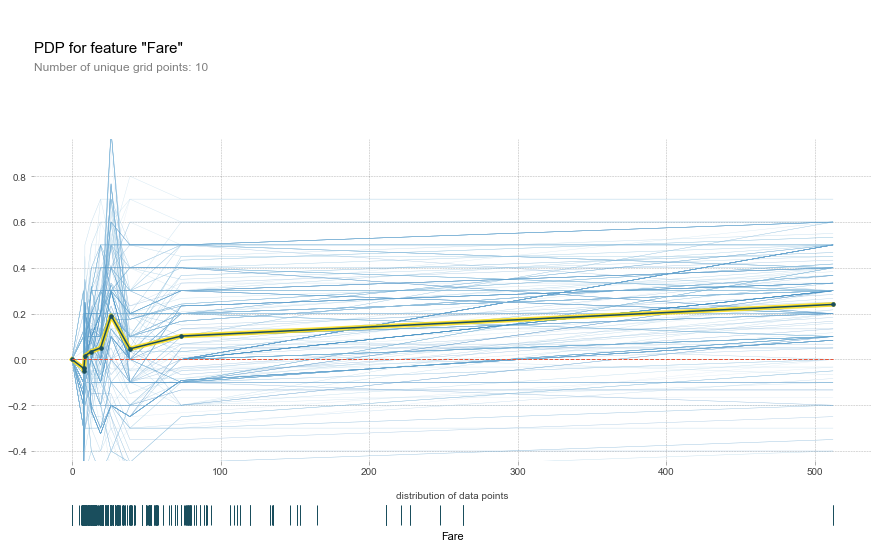

In [58]:
fig, axes = pdp.pdp_plot(pdp_fare, 'Fare', plot_lines=True, frac_to_plot=0.5, plot_pts_dist=True)

In [59]:
pdp_embarked = pdp.pdp_isolate(
    model=rf, dataset=X_titanic_train, model_features=titanic_features, feature='Embarked'
)

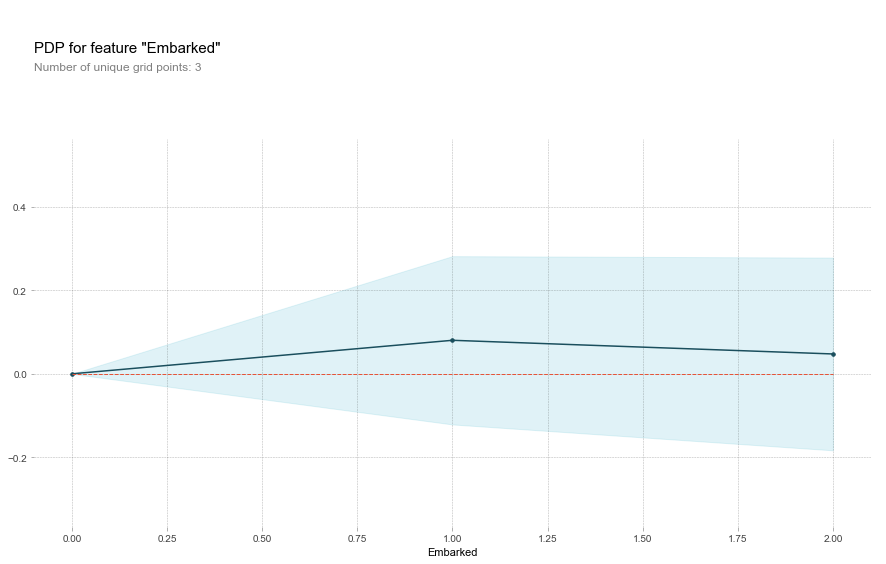

In [60]:
fig, axes = pdp.pdp_plot(pdp_embarked, 'Embarked')
_ = axes['pdp_ax']

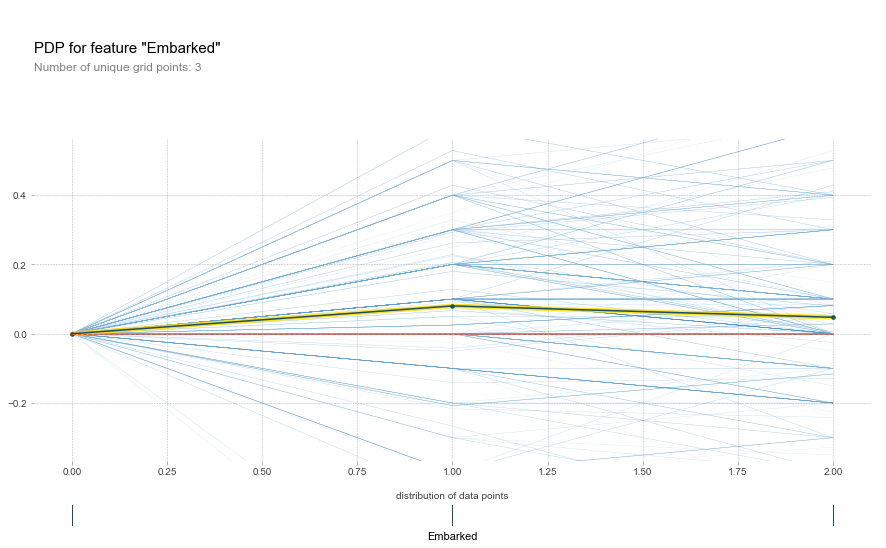

In [61]:
fig, axes = pdp.pdp_plot(pdp_embarked, 'Embarked', plot_lines=True, frac_to_plot=0.5, plot_pts_dist=True)

From the partial dependency plot, it appears that "SibSp", "Parch" and "Embarked" do not contribute significantly to the model. They might be potential candidates to be dropped as features.

## Feature Engineering 

In this section, you should first briefly explain your thought process - what is good, what is lacking, and what are the potential areas of information the model has yet to exploit. Following which, do some feature engineering. After every engineered feature, re-run your model and observe if there is an improvement in scores.

Running your feature importance again at different points in time can help to validate if your variables are truly important, or are they simply collinear.

In [62]:
titanic_eng = pd.read_csv('data/titanic.csv')
titanic_test_eng = pd.read_csv('data/titanic_test.csv')

In [63]:
titanic_eng['Embarked'] = titanic_eng['Embarked'].fillna(freq_port)
titanic_eng['Age'] = titanic_eng['Age'].fillna(avg_age)

titanic_test_eng['Embarked'] = titanic_test_eng['Embarked'].fillna(freq_port)
titanic_test_eng['Age'] = titanic_test_eng['Age'].fillna(avg_age)

titanic_eng['Embarked'] = titanic_eng['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
titanic_eng['Sex'] = titanic_eng['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

titanic_test_eng['Embarked'] = titanic_test_eng['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
titanic_test_eng['Sex'] = titanic_test_eng['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [64]:
titanic_eng = titanic_eng.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)

titanic_test_eng = titanic_test_eng.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)

In [65]:
combine = [titanic_eng, titanic_test_eng]

CREATING TITLE FEATURE

In [66]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [67]:
titanic_eng.groupby(['Title']).size()

Title
Capt          1
Col           2
Countess      1
Don           1
Dr            7
Jonkheer      1
Lady          1
Major         2
Master       40
Miss        182
Mlle          2
Mme           1
Mr          517
Mrs         125
Ms            1
Rev           6
Sir           1
dtype: int64

In [68]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 
                                                 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
titanic_eng[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [69]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

titanic_eng.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1,3.0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0,2.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,0,3.0
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0,1.0


In [70]:
titanic_eng = titanic_eng.drop(['Name'], axis=1)
titanic_test_eng = titanic_test_eng.drop(['Name'], axis=1)
combine = [titanic_eng, titanic_test_eng]

CREATING TRAVELLING WITHOUT FAMILY FEATURE

In [71]:
for dataset in combine:
    conditions = [
        (dataset['SibSp'] + dataset['Parch'] >= 1),
        (dataset['SibSp'] + dataset['Parch'] == 0)]
    choices = [0, 1]
    dataset['Alone'] = np.select(conditions, choices, default=0)
    
titanic_eng.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Alone
0,0,3,1,22.0,1,0,7.2500,0,1.0,0
1,1,1,0,38.0,1,0,71.2833,1,3.0,0
2,1,3,0,26.0,0,0,7.9250,0,2.0,1
3,1,1,0,35.0,1,0,53.1000,0,3.0,0
4,0,3,1,35.0,0,0,8.0500,0,1.0,1


In [72]:
Y_titanic_eng = titanic_eng["Survived"]
X_titanic_eng = titanic_eng.drop(['Survived'], axis=1)

In [73]:
X_titanic_eng_train, X_titanic_eng_cv, Y_titanic_eng_train, Y_titanic_eng_cv = train_test_split(X_titanic_eng,
                                                                                                Y_titanic_eng,
                                                                                                train_size=0.7,
                                                                                                test_size=0.3,
                                                                                                random_state=0)

# 4. Model Re-Training and Fine-Tuning

## Model Re-Training

When you are confident of your variables, re-run your model with all your variables again, and observe your feature importance. At times having extra variables may even deprove scores. You may also wish to remove features that show insignificant partial dependence. 

How much accuracy did these engineered features give? How important were these features? At this point in time, you may wish to talk to your peers and identify features they came up with (original ones, not those taken from the internet). This is a stage where brainstorming and contextual knowledge is extremely helpful.

In [74]:
rf_model = RandomForestClassifier()
rf_model.fit(X_titanic_eng_train, Y_titanic_eng_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [75]:
rf_model.score(X_titanic_eng_cv, Y_titanic_eng_cv)

0.8283582089552238

In [76]:
feature_eng_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index = X_titanic_eng_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
print(feature_eng_importances)

          importance
Fare        0.230885
Age         0.218860
Sex         0.198587
Title       0.124805
Pclass      0.097034
SibSp       0.049777
Embarked    0.036833
Parch       0.031154
Alone       0.012064


## Model Tuning - Good for presentation

Finally, we should do some model tuning. We previously ran a "default" model, with no customization inside our RandomForestClassifier model. However, if we were to look at the parameters, we'll see that there are many you can change.

In [77]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Evidently, there are many variables worth checking out. For now, some of the most salient ones are `max_depth`, `max_leaf_nodes`, `max_features` and `n_estimators`. These are in general, all parameters we tweak to decrease overfitting. Try tuning these parameters, plotting a graph of model accuracy against parameter variation for each variable.

Other useful parameters are `oob_score`, which serves as a validation set of unsampled data points during the bootstrap, and `n_jobs`, which parallelises the process. We recommend you set `oob_score` to `True` (and use the oob_score as a metric), and `n_jobs` to `-1` to speed up your training process.
<br /><br />
<font color=red>This is not a prerequisite per se, but at this point, you should try to understand the bootstrapping concept. After all, this single concept gave rise to random forests and many other statistical methods we know today!</font>

# max_depth

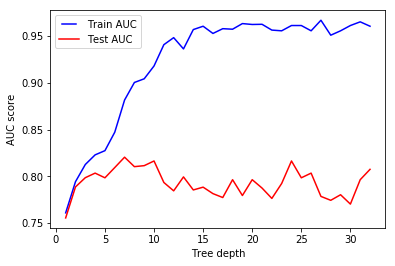

In [78]:
max_depths = np.linspace(1, 32, 32, endpoint=True)

train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(X_titanic_eng_train, Y_titanic_eng_train)

   train_pred = rf.predict(X_titanic_eng_train)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_titanic_eng_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)

   y_pred = rf.predict(X_titanic_eng_cv)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_titanic_eng_cv, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

Model overfits at larger depths. Max_depth of 3 is selected because after 3, the test performance fluctuates around the same level or lower.

# max_features

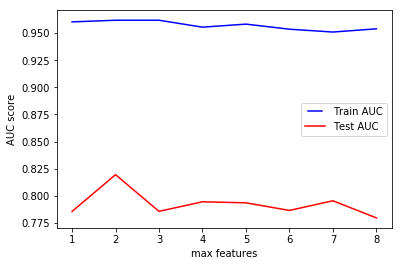

In [79]:
max_features = list(range(1,X_titanic_eng_train.shape[1]))

train_results = []
test_results = []
for max_feature in max_features:
   rf = RandomForestClassifier(max_features=max_feature)
   rf.fit(X_titanic_eng_train, Y_titanic_eng_train)

   train_pred = rf.predict(X_titanic_eng_train)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_titanic_eng_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)

   y_pred = rf.predict(X_titanic_eng_cv)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_titanic_eng_cv, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

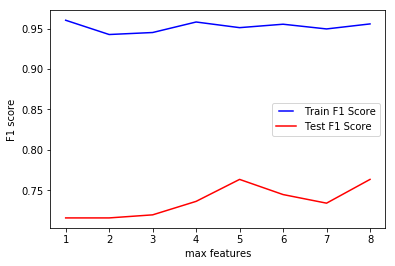

In [80]:
max_features = list(range(1,X_titanic_eng_train.shape[1]))

train_results = []
test_results = []
for max_feature in max_features:
   rf = RandomForestClassifier(max_features=max_feature)
   rf.fit(X_titanic_eng_train, Y_titanic_eng_train)

   train_pred = rf.predict(X_titanic_eng_train)

   score = f1_score(Y_titanic_eng_train, train_pred)
   train_results.append(score)

   y_pred = rf.predict(X_titanic_eng_cv)

   score = f1_score(Y_titanic_eng_cv, y_pred)
   test_results.append(score)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_features, train_results, 'b', label='Train F1 Score')
line2, = plt.plot(max_features, test_results, 'r', label='Test F1 Score')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('F1 score')
plt.xlabel('max features')
plt.show()

From both AUC and F1 score, it is observed that no matter the number of features, the model seem to overfit. The default setting would be used for max_features.

# n_estimators

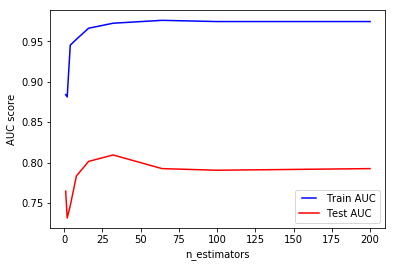

In [81]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]

train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(X_titanic_eng_train, Y_titanic_eng_train)

   train_pred = rf.predict(X_titanic_eng_train)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_titanic_eng_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)

   y_pred = rf.predict(X_titanic_eng_cv)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_titanic_eng_cv, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

32 trees is selected as increasing the number of trees decreases the test performance.

### Subsampling 

The `fastai` library has a very cool method called `set_rf_samples`, which sets the number of subsamples we use in each tree we initalize. For more information, you may refer [here on stackoverflow](https://stackoverflow.com/questions/44955555/how-can-i-set-sub-sample-size-in-random-forest-classifier-in-scikit-learn-espec). You might wish to play with this variable, as it can give you some improved performance.

### Cross Validation (Optional)

If we think about what we do with validation, we're actually taking a portion (20%) of our data out of our training set for validation purposes. This means that we are sacrificing training data (and hence predictive power) to create a less overfitted, more generalised model. There is a trade-off for our model: we remove overfitting (variance) by sacrificing predictive power (increasing bias). This is known as the bias variance trade-off, which we will go into more detail next week.

We will go into details next week, but in short, this can be avoided using cross validation. If you have done this before, you may use cross validation to improve the model here. Report your accuracy.

Otherwise, if we know all the validation scores for all our models, simply pick the best model in terms of validation score. Report your accuracy. 

Put back all our data into one big training set, and re-train the model using this training set. You can now make a prediction on your test set, and submit your result to Kaggle!

### Finalised Model

In [82]:
titanic_test_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Pclass      418 non-null int64
Sex         418 non-null int32
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Embarked    418 non-null int32
Title       418 non-null float64
Alone       418 non-null int32
dtypes: float64(3), int32(3), int64(3)
memory usage: 24.6 KB


In [83]:
titanic_test_eng.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
Title       0
Alone       0
dtype: int64

In [84]:
avg_fare = X_titanic_eng.Fare.mean()
avg_fare

32.2042079685746

In [85]:
titanic_test_eng['Fare'] = titanic_test_eng['Fare'].fillna(avg_fare)

In [86]:
rf_model_final = RandomForestClassifier(max_depth=3, n_estimators=32, n_jobs=-1)
rf_model_final.fit(X_titanic_eng, Y_titanic_eng)
y_pred = rf_model_final.predict(titanic_test_eng)

In [87]:
test = pd.read_csv('data/titanic_test.csv')
predictions = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': y_pred})

### Submission

What is your Kaggle leaderboard performance? Please provide your Kaggle username as well. We hope you have had a prediction accuracy of at least 78%, but it's okay if you don't.

In [88]:
predictions[['PassengerId', 'Survived']].to_csv('data/submission.csv', index=False)

In [89]:
# Accuracy: 0.78468
# Kaggle name: Raymond Tay

## Future Improvements

Not all models are perfect, especially not in the constraint of time. Do some research on the models that do better than you, and list out the areas that you can improve on in the long run. Prioritise these improvements and spell out how you can implement them if they are non-trivial to implement.

- Ensembling/stacking instead of using a single RF model
- 

# 5. Building your Random Forest from Scratch

Congratulations! You have completed the tutorial on random forests... not!

Apart from modelling, each week, you will also be expected to implement the models we are using. After all, the best way to learn is to implement from scratch. AI Apprentices are not only expected to model, but also do the necessary engineering for real life problems, and many such problems require custom code. For example, we may want to use subsampling to improve our model performance, but edge-cutting methods would not yet be available in common libraries. When this happens, you will have to address these problems yourself.

Numerical programming might be new to some, if you did not come from the R/Matlab side of things. To get yourself up to speed with numerical programming in Python, we highly recommend Wes McKinney's [Python for Data Analysis, 2nd Ed.](https://www.safaribooksonline.com/library/view/python-for-data/9781491957653/)

__Note__: In this guided implementation, we made 2 decisions, firstly to use a Python `class`, i.e. object oriented programming (arguably so at least), and secondly to use the `numpy` library. Neither of these decisions are compulsory - if you have prior experience in another style, or using alternative libraries, feel free to do so, and modify the script to allow your code to run. However, if you have no prior experience, we suggest sticking to this format - we will follow `scikit-learn`'s format, which we believe is increasingly an industry standard.

## Decision Trees 

A random forest, as the the name suggests, is made up of many decision trees, each with levels of variation and randomness. Before looking at random forests, we will look at understanding what decision trees do.

Decision trees, more specifically Classification and Regression Trees (CARTs), are an algorithm/data structure that learns to split data out based on rules it learns. There are many resources out there to get a good understanding of what CARTs are, which you may wish to reference while accomplishing the tasks here.

### Gini Criterion

If you remember from `get_params`, there exists a parameter `criterion: 'gini'`. This means that the tree is using Gini as a criterion to decide how to separate the data.

Hence, we will first learn how to use the Gini impurity score. The Gini impurity score of a node n is given as:  

<center>$i(n) = 1 - p^2_0 - p^2_1$,  </center>  

Where $p_1$ refers to the proportion of 1's in that node, and $p_0$ refers to the proportion of 0's.

In [90]:
from src.decision_tree import DecisionTree

For the above line of code to work, you will have to do the following if you haven't done so:
1. Create a folder called src at the directory of your current notebook
2. Create a __init__.py empty file in the src folder -see http://mikegrouchy.com/blog/2012/05/be-pythonic-__init__py.html
3. Create a file, `decision_tree.py`. You can consider the terminal script `touch decision_tree.py`
4. create a class `DecisionTree` inside `deicison_tree.py`

You may realise that for this part of the coursework, we are not writing code directly into Jupyter notebooks, but inside the /src/ folder as `.py` files. We are maintaining a code base, outside of the Jupyter notebook. We do this for two reasons - 1) because this code is highly reusable in future sessions, beyond the scope of one notebook. 2) because such code bases are collaboration-friendly, as Git and Jupyter notebooks do not play well with each other, but python files do. In the future, non-exploratory code will be written in teams, so scripts would be a more collaboration friendly format. The `src/` folder structure is a very basic and light introduction to this, but in short, each project should have a different folder structure to cater to its needs.

In [91]:
def approx_eq(a, b, num_sig=5):
    return round(a, num_sig) == round(b, num_sig)

In [92]:
approx_eq(DecisionTree().gini([1, 0, 0, 0, 0], [1, 1, 1, 1, 0]), .32)
# for the above line of code to work,
# 1. create a method gini that takes in 2 arrays and computes the node's gini impurity
# 2. implement the method as per the mathematical formula given
# 3. if you would like to turn this into a private method, make the necessary adjustments
# -> DecisionTree()._DecisionTree__gini()

True

### fit(X_train, y_train)

Following sklearn's `fit` and `predict`/`score` approach to programming, we will be implementing the fit and predict methods. First, we will attempt to implement a fit method.

The fit method will take in 2 numpy matrices: a m\*n train array with m training examples of n features, and a m\*1 array of labels.

There are tons of resources available to describe the workings of a CART. We would encourage you to find a source that best suits your needs, but we have picked out two points which other resources may miss at the implementation stage. Feel free to find more resources to expand on these areas:

1. The CART is a recursive tree structure. Every node of the tree can be seen as a decision tree node. When it splits, its left and right branches and its child nodes. When fitting a tree, you should recursively fit the nodes of the tree, in a way that the fitting can be used to predict in the future.

2. In finding the best condition to split the variables, it is alright to iterate through every single unique value of every variable, and determine the best condition through the iterations. The best condition can be defined as the one that provides the most __information gain__, which is defined as the greatest loss in Gini impurity.

If this is your first time doing object oriented programming in Python, we would high recommend you expose yourself to some Python resources first, or read the Python documentation. __If you need more help with these methods, ask a peer with programming experience, or you can seek help from the team.__

In [93]:
# read a new csv and remove complicated columns
titanic = pd.read_csv('data/titanic.csv')
X_cols = titanic.columns
X_cols = X_cols.drop('Age')
X_cols = X_cols.drop('Cabin')
X_cols = X_cols.drop('Name')
X_cols = X_cols.drop('Ticket')
titanic = titanic[X_cols]

# one hot encoding for remainining multiclass columns
titanic['Sex_m'] = (titanic['Sex'] == 'male').astype('int')
titanic['Embarked_S'] = (titanic['Embarked'] == 'S').astype('int')
titanic['Embarked_C'] = (titanic['Embarked'] == 'C').astype('int')
titanic = titanic.drop(['Sex', 'Embarked'], axis=1)

# create X and y, test and train
X_cols = titanic.columns
X_cols = X_cols.drop('Survived')
X_titanic = titanic[X_cols]
y_titanic = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic, random_state=99)

In [94]:
dt = DecisionTree()

In [95]:
dt.fit(X_train.values, y_train.values)

AttributeError: 'DecisionTree' object has no attribute 'fit'

### predict(X_test)

If you have designed your `fit` method well, predict method will be naturally easy. If the node is a leaf, simply return the leaf value. If the node is not a leaf, call predict on one of its child nodes depending on whether it fits the condition.

__If you need more help with these methods, ask a peer with programming experience, or you can seek help from the team.__

In [ ]:
preds_dt = dt.predict(X_test.values)
sum(preds_dt == y_test)/len(y_test)

## Random Forests

Now that we have a decision tree, we can build a random forest, comprising of decision trees of randomised bootstraps of our dataset. At the simplest level, a random forest can be simply a list of decision trees that take a vote on the outcome of the prediction. This list can be an attribute of the random forest.

The basic modification of random forests is the use of bootstrapping. Bootstrapping is done in a few lines of code through `np.random.choice`.

Hence, to begin, build a simple random forest, that will initialise 5 trees through bootstrapping (sampling 100% with replacement), and predict the answer through a voting mechanism out of all the 5 trees. For computational efficiency, we recommend using `np.stack` and `np.array.mean`.

In [ ]:
rf_0 = RandomForest()
rf_0.fit(X_train.values, y_train.values)
preds_rf = rf_0.predict(X_test.values)
sum(preds_rf == y_test)/len(y_test)

Next, we will implement `n_trees` to be tweakable. In addition, we will have a `subsample_size` parameter, which does the subsampling that the sklearn's random forest could not do. We can continue to use `np.random.choice`, but if subsample_size > 1, we can sample without replacement instead. (Or you could have another parameter to adjust that too.)

In [ ]:
rf_1 = RandomForest(n_trees=10, subsample_size=0.8)
rf_1.fit(X_train.values, y_train.values)
preds_rf1 = rf_1.predict(X_test.values)
sum(preds_rf1 == y_test)/len(y_test)

Finally, we will implement the `feature_proportion` feature, which refers to the number of features we allow each tree to use. This further increases the randomness and eliminates overfitting.

In [ ]:
rf_2 = RandomForest(n_trees=100, subsample_size=0.5, feature_proportion=0.5)
rf_2.fit(X_train.values, y_train.values)
preds_rf2 = rf_2.predict(X_test.values)
sum(preds_rf2 == y_test)/len(y_test)

You may wish to attempt to implement other optional parameters of random forest. One important parameter is `max_features` which makes the tree lose some features at every node, or `max_depth`, which limits the number of levels the tree can have. However, we chose to leave these out, as they require tweaking at the decision tree level, which is an exercise left for your own choice.

__Congratulations!__ You have finally come to the end of the week 1. Hope you had as much fun as we had building it!

<img src="https://www.ambitiouskitchen.com/wp-content/uploads/2014/03/glutenfreecookies-6.jpg" />

ref for decision tree: https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/

ref for implementation of decision tree: https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/